In [3]:
import pandas as pd
import numpy as np
import spacy
pd.set_option('display.width',1000)
pd.set_option('max_colwidth', 1000) 
nlp = spacy.load('en_core_web_sm')
import nltk
from nltk.corpus import stopwords
stpwrds = set(stopwords.words('english'))
stpwrds.discard('not')
stpwrds.discard('no')

In [3]:
%cd "BEPEC Python Material\"

C:\BEPEC Python Material


In [4]:
df = pd.read_csv('abcnews-date-text.csv' , nrows=10000)
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting licence
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


## Basic Statistics

<AxesSubplot:>

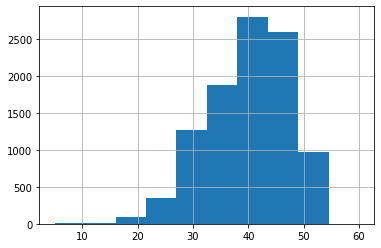

In [6]:
## Review length
df['headline_text'].apply(lambda x : len(x)).hist()

<AxesSubplot:>

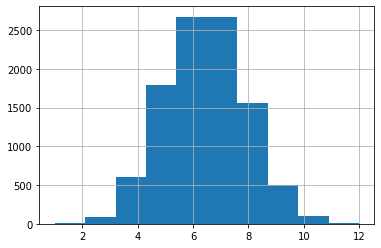

In [7]:
## word lenght
df['headline_text'].apply(lambda x : x.split()).apply(len).hist()

<AxesSubplot:>

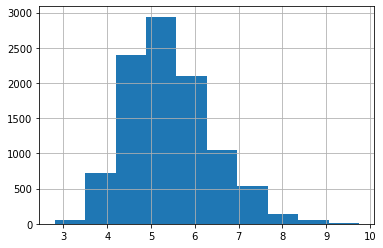

In [8]:
## Average word lenght
df['headline_text'].str.split().apply(lambda x:[len(i) for i in x]).apply(lambda x:np.mean(x)).hist()

1. Above the info is right skewed and showing small words may be bcz of stop words so we'll see first the top stop words.

In [9]:
## plotting top stop words
corpus = df['headline_text'].str.split()
corpus = corpus.values.tolist()
corpus = [word for i in corpus for word in i]
corpus
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stpwrds:
        dic[word]+=1
dic

defaultdict(int,
            {'against': 134,
             'be': 213,
             'of': 727,
             'a': 126,
             'for': 1295,
             'in': 1450,
             'to': 2365,
             'with': 303,
             'over': 537,
             'is': 55,
             'into': 150,
             'as': 199,
             'should': 23,
             'out': 193,
             'on': 711,
             'up': 212,
             'will': 87,
             'at': 260,
             're': 13,
             'about': 46,
             'under': 79,
             'where': 3,
             'she': 2,
             'from': 162,
             'after': 316,
             'and': 121,
             'own': 7,
             'more': 187,
             'than': 31,
             'most': 11,
             'down': 111,
             'all': 40,
             'your': 3,
             'that': 4,
             'the': 210,
             'above': 3,
             'again': 27,
             'if': 18,
             'have': 50,
           

('to', 'in', 'for', 'of', 'on', 'over', 'after', 'with', 'at', 'be') (2365, 1450, 1295, 727, 711, 537, 316, 303, 260, 213)


<BarContainer object of 10 artists>

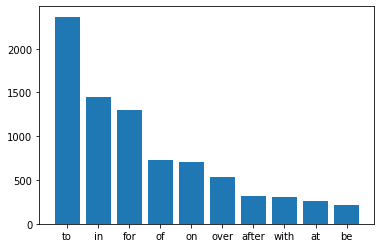

In [10]:
top = sorted(dic.items() , key= lambda x : x[1], reverse=True)[:10]
import matplotlib.pyplot as plt
x , y = zip(*top)
print(x,y)
plt.bar(x,y)

In [11]:
## plotting top words without stopwords
words , count = [] , []
from collections import Counter
total = Counter(corpus)
top  = total.most_common()
for i,j in top[:40]:
    if (i not in stpwrds):
        words.append(i)
        count.append(j)
words

['us',
 'iraq',
 'war',
 'police',
 'govt',
 'man',
 'new',
 'says',
 'council',
 'iraqi',
 'not',
 'may',
 'fire',
 'plan',
 'nsw',
 'baghdad',
 'court',
 'water',
 'anti',
 'world']

<BarContainer object of 20 artists>

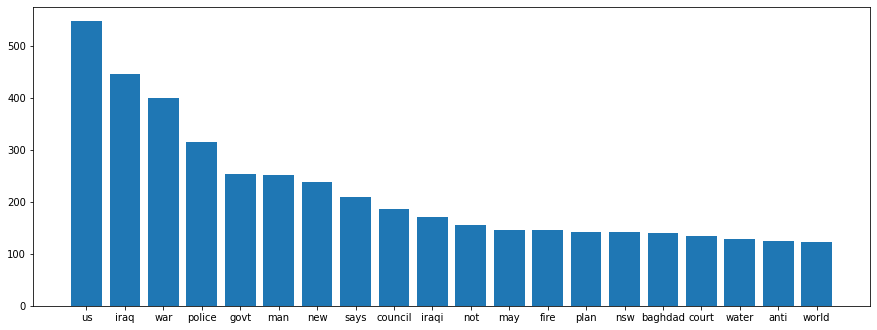

In [12]:
plt.figure(figsize = (15,5.5))
plt.bar(words , count )

In [13]:
## Bia-gram exploration
from nltk.util import ngrams
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

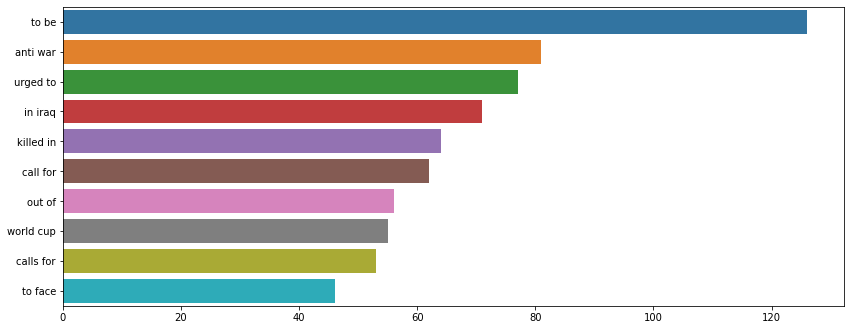

In [14]:
top_n_bigrams = get_top_ngram(df['headline_text'],2)
x,y = map(list,zip(*top_n_bigrams))
import seaborn as sns
plt.figure(figsize = (14,5.5))
sns.barplot(x = y , y = x)

<AxesSubplot:>

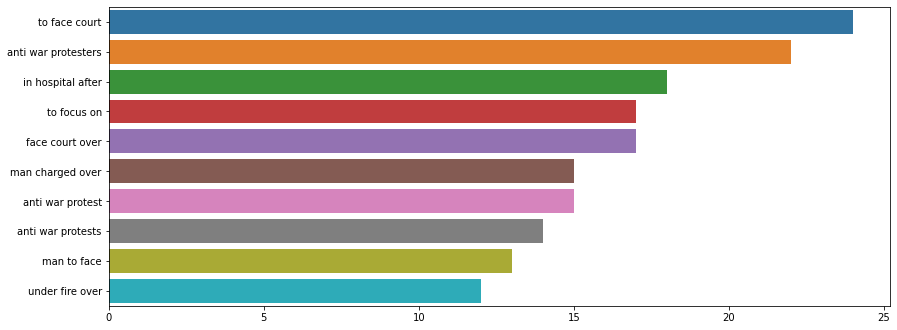

In [15]:
top_n_bigrams = get_top_ngram(df['headline_text'],3)
x,y = map(list,zip(*top_n_bigrams))
import seaborn as sns
plt.figure(figsize = (14,5.5))
sns.barplot(x = y , y = x)

1. topic Modeling

In [7]:
from nltk.stem import WordNetLemmatizer
def preprocess_news(news):
    corpus=[]

    lem=WordNetLemmatizer()
    for news in news['headline_text']:
        words=[w for w in nltk.word_tokenize(news) if (w not in stpwrds)]
        
        words=[lem.lemmatize(w , pos='v') for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_news(df)

In [47]:
import gensim
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]
#print(bow_corpus.shape)
bow_corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)],
 [(11, 1), (12, 1), (13, 1), (14, 1)],
 [(15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)],
 [(15, 1), (20, 1), (21, 1), (22, 1), (23, 1)],
 [(24, 1), (25, 1), (26, 1), (27, 1), (28, 1)],
 [(29, 1), (30, 1), (31, 1), (32, 1), (33, 1)],
 [(34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)],
 [(16, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(45, 1), (46, 1), (47, 1), (48, 1), (49, 1)],
 [(43, 1), (45, 1), (50, 1), (51, 1), (52, 1)],
 [(30, 1), (33, 1), (53, 1), (54, 1), (55, 1), (56, 1)],
 [(57, 1), (58, 1), (59, 1), (60, 1)],
 [(61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(60, 1), (61, 1), (66, 1), (67, 1), (68, 1), (69, 1)],
 [(70, 1), (71, 1), (72, 1), (73, 1), (74, 1)],
 [(75, 1), (76, 1), (77, 1), (78, 1), (79, 1)],
 [(79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1)],
 [(28, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1)],
 [(90, 1), (91, 1), (92, 1), (93, 1), (94, 1

In [48]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.015*"iraq" + 0.014*"baghdad" + 0.008*"fire" + 0.008*"iraqi" + 0.007*"war" + 0.007*"govt" + 0.006*"say" + 0.006*"troop" + 0.006*"killed" + 0.005*"two"'),
 (1,
  '0.006*"iraq" + 0.006*"back" + 0.006*"police" + 0.006*"may" + 0.005*"new" + 0.005*"govt" + 0.005*"seek" + 0.004*"concern" + 0.004*"council" + 0.004*"get"'),
 (2,
  '0.011*"war" + 0.010*"man" + 0.009*"police" + 0.008*"anti" + 0.008*"say" + 0.005*"court" + 0.005*"face" + 0.005*"woman" + 0.005*"not" + 0.005*"coast"'),
 (3,
  '0.009*"war" + 0.009*"iraq" + 0.008*"win" + 0.007*"claim" + 0.006*"iraqi" + 0.005*"cup" + 0.005*"coalition" + 0.004*"first" + 0.004*"world" + 0.004*"death"')]

In [52]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

C:\Users\Ali\.conda\envs\tensor_ali\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.118451  0.098112       1        1  26.611742
0      0.058408 -0.135178       2        1  25.617132
2      0.140460  0.101856       3        1  23.971065
1     -0.080417 -0.064790       4        1  23.800061, topic_info=         Term        Freq       Total Category  logprob  loglift
3496  baghdad  190.000000  190.000000  Default  30.0000  30.0000
589      anti  113.000000  113.000000  Default  29.0000  29.0000
318       man  204.000000  204.000000  Default  28.0000  28.0000
8        fire  149.000000  149.000000  Default  27.0000  27.0000
423     claim  148.000000  148.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
8        fire   36.278991  149.614265   Topic4  -5.8160   0.0187
60       plan   35.834215  158.217499   Topic4  -5.8284  -0.0496
489     world   32.301242  111.632143   Topic4  -5.9322   0.1954
468       say   32.467537  214.939198   Topic4  -5.9270  -0.4546
49        war   33.269658  388.258375   Topic4  -5.9026  -1.0215

[295 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1479      4  0.958522     africa
506       1  0.979377  agreement
15        1  0.310573        air
15        2  0.179806        air
15        3  0.016346        air
...     ...       ...        ...
2427      4  0.933177        yet
132       4  0.971962      youth
441       1  0.038990   zimbabwe
441       2  0.935757   zimbabwe
441       3  0.038990   zimbabwe

[477 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

1. POS

In [5]:
## Practice
x = df['headline_text'][0]
x = nlp(x)
l1 = []
l2 = []
l1 = [(token.text,token.pos_) for token in x if token.pos_ == 'VERB']
l2 = list(map(list,zip(*l1)))[0]
print(l2)
def pos_identification(text):
    x = nlp(text)
    l1 = [(token.text,token.pos_) for token in x]
    l2 = list(map(list,zip(*l1)))[1]
    return l2

tags = df['headline_text'].apply(lambda x : pos_identification(x))
tags = [i for j in tags for i in j]
Count = Counter(tags)
x , y = list(map(list,zip(*Count.most_common(10))))
sns.barplot(x = y , y = x)

['decides']


NameError: name 'Counter' is not defined

In [25]:
print(spacy.explain('ADP'))
print(spacy.explain('PART'))
print(spacy.explain('DET'))
print(spacy.explain('AUX'))


adposition
particle
determiner
auxiliary


In [40]:
l1 = []
l2 = []
def pos_identification(text):
    x = nlp(text)
    for token in x:
        if token.pos_ == 'NOUN':
            var = token.text
            l1.append(var)
            
    return l1
tokens = df['headline_text'].apply(lambda x : pos_identification(x))
tokens

0       [aba, community, broadcasting, licence, act, fire, witnesses, defamation, g, infrastructure, protection, summit, air, staff, strike, pay, rise, air, strike, travellers, olsson, jump, record, breaking, barca, stosur, match, security, council, iraq, australia, war, timetable, aid, iraq, barca, take, record, robson, birthday, bathhouse, plans, hopes, launceston, cycling, championship, plan, paroo, water, supplies, blizzard, buries, states, bills, brigadier, reports, troops, combat, troops, kuwait, bryant, lakers, overtime, win, bushfire, victims, centrelink, businesses, attacks, calleri, defeat, massu, ethanol, blend, fuel, carews, freak, goal, roma, ruins, cemeteries, funds, code, conduct, toughens, organ, donation, regulations, commonwealth, bank, cuts, home, loan, rates, community, youth, council, chief, executive, position, ...]
1       [aba, community, broadcasting, licence, act, fire, witnesses, defamation, g, infrastructure, protection, summit, air, staff, strike, pay, rise

## Topic Modeling

In [6]:
data_text = df[['headline_text']]
data_text['index'] = data_text.index
documents = data_text
print(len(documents))
documents[:5]

10000


,headline_text,index
0,aba decides against community broadcasting licence,0
1,act fire witnesses must be aware of defamation,1
2,a g calls for infrastructure protection summit,2
3,air nz staff in aust strike for pay rise,3
4,air nz strike to affect australian travellers,4


In [9]:
from nltk.stem import WordNetLemmatizer
def preprocess_news(news):
    corpus=[]

    lem=WordNetLemmatizer()
    for news in news['headline_text']:
        words=[w for w in nltk.word_tokenize(news) if (w not in stpwrds)]
        
        words=[lem.lemmatize(w , pos='v') for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_news(documents)
corpus[:10]

[['aba', 'decide', 'community', 'broadcast', 'licence'],
 ['act', 'fire', 'witness', 'must', 'aware', 'defamation'],
 ['call', 'infrastructure', 'protection', 'summit'],
 ['air', 'staff', 'aust', 'strike', 'pay', 'rise'],
 ['air', 'strike', 'affect', 'australian', 'travellers'],
 ['ambitious', 'olsson', 'win', 'triple', 'jump'],
 ['antic', 'delight', 'record', 'break', 'barca'],
 ['aussie', 'qualifier', 'stosur', 'waste', 'four', 'memphis', 'match'],
 ['aust', 'address', 'security', 'council', 'iraq'],
 ['australia', 'lock', 'war', 'timetable', 'opp']]

In [11]:
documents.head(10)

,headline_text,index
0,aba decides against community broadcasting licence,0
1,act fire witnesses must be aware of defamation,1
2,a g calls for infrastructure protection summit,2
3,air nz staff in aust strike for pay rise,3
4,air nz strike to affect australian travellers,4
5,ambitious olsson wins triple jump,5
6,antic delighted with record breaking barca,6
7,aussie qualifier stosur wastes four memphis match,7
8,aust addresses un security council over iraq,8
9,australia is locked into war timetable opp,9


In [1]:
from gensim.corpora import Dictionary

texts = [['human', 'interface', 'computer','non_existent_word'],["cat", "say", "meow","computer"], ["dog"]]
dct = Dictionary(texts)  # initialize a Dictionary
#dct.add_documents([])  # add more document (extend the vocabulary)
for i , j in dct.items():
    print(i , j)
print(len(dct))
dct.doc2bow(["dog", "computer", "cat","computer","dog"]) # (token_id , token_count)

0 computer
1 human
2 interface
3 non_existent_word
4 cat
5 meow
6 say
7 dog
8


[(0, 2), (4, 1), (7, 2)]

In [37]:
for i , j in dct.items():
    print(i , j)
    

0 computer
1 human
2 interface
3 non_existent_word
4 cat
5 meow
6 say
7 dog


In [44]:
## Create a dictionary from ‘corpus’ containing the number of times a word appears in the training set.
dictionary = gensim.corpora.Dictionary(corpus)
dictionary

<IPython.core.display.Javascript object>

In [45]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)#API https://radimrehurek.com/gensim/corpora/dictionary.html
count = 0
for i , j in dictionary.items():
    print(i , j)
    count+=1
    if count > 10:
        break

0 community
1 decide
2 act
3 fire
4 must
5 witness
6 call
7 summit
8 air
9 aust
10 pay


In [46]:
bow_corpus = [dictionary.doc2bow(doc) for doc in corpus]
bow_corpus[1]

[(2, 1), (3, 1), (4, 1), (5, 1)]

In [52]:
bow_doc_1 = bow_corpus[1]
for i in range(len(bow_doc_1)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_1[i][0], 
                                               dictionary[bow_doc_1[i][0]], 
bow_doc_1[i][1]))

Word 2 ("act") appears 1 time.
Word 3 ("fire") appears 1 time.
Word 4 ("must") appears 1 time.
Word 5 ("witness") appears 1 time.


In [54]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=3, id2word=dictionary, passes=2, workers=2)
lda_model.show_topics()

<IPython.core.display.Javascript object>

[(0,
  '0.018*"new" + 0.013*"call" + 0.012*"find" + 0.011*"sars" + 0.011*"world" + 0.010*"cup" + 0.009*"hospital" + 0.008*"get" + 0.008*"continue" + 0.007*"fire"'),
 (1,
  '0.016*"govt" + 0.014*"council" + 0.013*"win" + 0.013*"say" + 0.013*"iraqi" + 0.012*"war" + 0.008*"fire" + 0.008*"not" + 0.007*"may" + 0.007*"fund"'),
 (2,
  '0.036*"iraq" + 0.026*"war" + 0.023*"police" + 0.018*"baghdad" + 0.017*"plan" + 0.015*"man" + 0.011*"force" + 0.011*"charge" + 0.010*"report" + 0.009*"back"')]

In [55]:
doc_lda = lda_model[bow_corpus]
doc_lda

In [57]:
doc_lda

In [62]:
topics_matrix = lda_model.show_topics(formatted=False, num_words=20)
topics_matrix = np.array(topics_matrix)
topics_matrix
topic_words = topics_matrix[:,1]
for i in topic_words:
    print([str(word) for word in i])
    print()

["('new', 0.017801356)", "('call', 0.01342665)", "('find', 0.011549887)", "('sars', 0.011150546)", "('world', 0.010766102)", "('cup', 0.0100609055)", "('hospital', 0.008874823)", "('get', 0.007991244)", "('continue', 0.007862956)", "('fire', 0.0074831727)", "('claim', 0.0072920145)", "('australia', 0.007281329)", "('concern', 0.007185106)", "('face', 0.007085284)", "('water', 0.007042937)", "('coast', 0.006402312)", "('service', 0.00624877)", "('air', 0.006200967)", "('attack', 0.0061616283)", "('set', 0.0058306106)"]

["('govt', 0.016061438)", "('council', 0.013916104)", "('win', 0.013494268)", "('say', 0.012954439)", "('iraqi', 0.012661533)", "('war', 0.011696377)", "('fire', 0.008495932)", "('not', 0.008252576)", "('may', 0.007427741)", "('fund', 0.007361037)", "('nsw', 0.007095671)", "('take', 0.0070316927)", "('first', 0.006826566)", "('meet', 0.006714401)", "('qld', 0.006124116)", "('end', 0.006067853)", "('saddam', 0.006031912)", "('hit', 0.005839684)", "('lead', 0.00573783)", "

<ipython-input-62-1d962fef1ca5>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  topics_matrix = np.array(topics_matrix)


In [89]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[bow_corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Topic', 'Percentage_cont', 'Topic_Keywords']
    sent_topics_df['Topic'] = sent_topics_df['Topic'].astype('int32')
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


In [90]:
df_final = format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus, texts=df['headline_text'].values)
df_final

,Topic,Percentage_cont,Topic_Keywords,0
0,1,0.7561,"govt, council, win, say, iraqi, war, fire, not, may, fund",aba decides against community broadcasting licence
1,2,0.8390,"iraq, war, police, baghdad, plan, man, force, charge, report, back",act fire witnesses must be aware of defamation
2,0,0.7717,"new, call, find, sars, world, cup, hospital, get, continue, fire",a g calls for infrastructure protection summit
3,0,0.6573,"new, call, find, sars, world, cup, hospital, get, continue, fire",air nz staff in aust strike for pay rise
4,0,0.8526,"new, call, find, sars, world, cup, hospital, get, continue, fire",air nz strike to affect australian travellers
...,...,...,...,...
9995,2,0.9004,"iraq, war, police, baghdad, plan, man, force, charge, report, back",vic govt plan aims to reduce water use
9996,1,0.6045,"govt, council, win, say, iraqi, war, fire, not, may, fund",vic govt urged to green light marina plan
9997,1,0.8785,"govt, council, win, say, iraqi, war, fire, not, may, fund",vic nats leave door open on coalition
9998,0,0.8212,"new, call, find, sars, world, cup, hospital, get, continue, fire",waterfall survivors tell of train speeding before


In [70]:
l1 = [(1,2),(3,4)]
for i ,(j,k) in enumerate(l1):
    print(i,j,k)

0 1 2
1 3 4


In [78]:
wp = lda_model.show_topic(0)
key_word = [word for word , prop in wp]
key_word = ', '.join(key_word)
key_word

'new, call, find, sars, world, cup, hospital, get, continue, fire'

In [81]:
pd.Series([1,12,100],[2,33,200])

2        1
33      12
200    100
dtype: int64

## NER

In [8]:
import warnings
warnings.filterwarnings('ignore')
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

In [9]:
def NER(text):
    doc = nlp(text)
    ents = [X.label_ for X in doc.ents]
    return ents
ents = df['headline_text'].apply(lambda x : NER(x))
ents

0       []
1       []
2       []
3       []
4       []
        ..
9995    []
9996    []
9997    []
9998    []
9999    []
Name: headline_text, Length: 10000, dtype: object

In [15]:
from collections import Counter
ent=[x for sub in ents for x in sub]

counter=Counter(ent)
count=counter.most_common()
count

[('CARDINAL', 710),
 ('DATE', 276),
 ('ORDINAL', 166),
 ('NORP', 64),
 ('GPE', 59),
 ('TIME', 23),
 ('QUANTITY', 15),
 ('MONEY', 10),
 ('PERSON', 9),
 ('ORG', 6),
 ('PERCENT', 1),
 ('PRODUCT', 1)]

<AxesSubplot:>

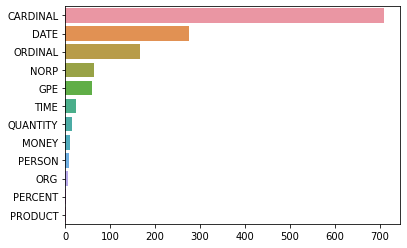

In [18]:
x , y = list(map(list,zip(*count)))
import seaborn as sns
sns.barplot(x = y , y = x)

In [23]:
print(spacy.explain('CARDINAL'))
print(spacy.explain('ORDINAL'))
print(spacy.explain('NORP'))


Numerals that do not fall under another type
"first", "second", etc.
Nationalities or religious or political groups


<AxesSubplot:>

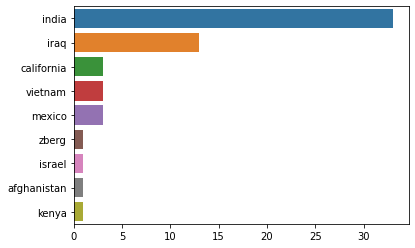

In [24]:
def ner(text,ent="GPE"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe=df['headline_text'].apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)


<AxesSubplot:>

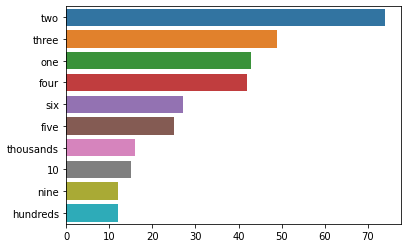

In [25]:
gpe=df['headline_text'].apply(lambda x: ner(x ,'CARDINAL' ))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)


<AxesSubplot:>

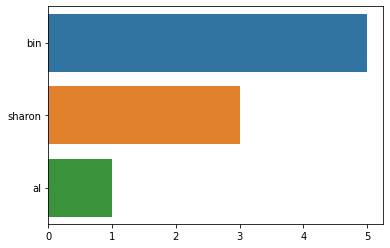

In [27]:
gpe=df['headline_text'].apply(lambda x: ner(x ,'PERSON' ))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)


In [6]:
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting licence
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


# Finding characteristics terms and thier associations

In [1]:
dic = {'Text': ["This car is awesome",
               "the BMW car have high speed",
               "porche have introduced a new high speed car",
               "We are going to a car show",
               "I love BMW car",
               "Mercedes have introdiced a high speed bike",
               "sedan cars are beautiful and echonomical",
               "this car have echonomical price",
               "most sedan cars are echonomical and cheap",
               "some sedans are very cheap",
               "i love 4-door sedans",
               "4-door echonomical vehicles are sometimes fast"],
        'Class': ["luxury","luxury","luxury","luxury","luxury","luxury" , "Medium","Medium","Medium","Medium","Medium","Medium"]}
df = pd.DataFrame(dic)
df

<IPython.core.display.Javascript object>

,Text,Class
0,This car is awesome,luxury
1,the BMW car have high speed,luxury
2,porche have introduced a new high speed car,luxury
3,We are going to a car show,luxury
4,I love BMW car,luxury
5,Mercedes have introdiced a high speed bike,luxury
6,sedan cars are beautiful and echonomical,Medium
7,this car have echonomical price,Medium
8,most sedan cars are echonomical and cheap,Medium
9,some sedans are very cheap,Medium


In [4]:
import spacy
import scattertext as st

corpus = st.CorpusFromPandas(df,
                             category_col='Class',
                             text_col='Text',
                             nlp=nlp).build()


In [5]:
corpus

In [6]:
print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

['echonomical', 'introdiced', 'porche', 'sedans', 'sedan', 'bmw', 'mercedes', 'awesome', 'bike', 'speed']


In [14]:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['luxry Score'] = corpus.get_scaled_f_scores('luxury')
#pprint(list(term_freq_df.sort_values(by='luxry Score', ascending=False).index[:10]))
term_freq_df.sort_values(by='luxry Score', ascending=False).index[:10]

Index(['a', 'high speed', 'speed', 'high', 'car', 'have', 'bmw', 'bmw car', 'to a', 'going to'], dtype='object', name='term')

In [15]:
term_freq_df['Med Score'] = corpus.get_scaled_f_scores('Medium')
term_freq_df.sort_values(by='Med Score', ascending=False).index[:10]

Index(['echonomical', 'are', 'sedan', 'cars', 'cheap', 'and', 'sedan cars', 'cars are', '4 door', 'sedans'], dtype='object', name='term')